<a href="https://colab.research.google.com/github/yahyalito/Ibrahim_Yahya_IP_Week_1_Core/blob/master/Ibrahim_Yahya_IP_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
pip install factor_analyzer==0.2.3

In [0]:
import pandas as pd

In [0]:
import seaborn as sns

In [0]:
import matplotlib.pyplot as plt

In [0]:
finance = pd.read_csv("http://bit.ly/FinancialDataset")

In [4]:
finance.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


**Question**

which individuals are most likely to have or use a bank account



In [5]:
finance.shape

(23524, 13)

In [6]:
finance.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [7]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [8]:
#check missing values
finance.isna().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [0]:
finance.shape

(23524, 13)

In [9]:
finance.rename(columns={"Has a Bank account":"Has_a_Bank_account",
                       "Type of Location" : "Type_of_Location",
                       "Cell Phone Access" : "Cell_Phone_Access",
                       "The relathip with head":"The_relationship_with_head",
                       "Level of Educuation" :"Level_of_Education",
                       "Type of Job" :"Type_of_Job",
                       "Respondent Age" : "Respondent_Age"} , inplace=True)
finance.head()

,country,year,uniqueid,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,The_relationship_with_head,marital_status,Level_of_Education,Type_of_Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
finance_dropped = finance.dropna()

In [11]:
finance_dropped.shape

(23343, 13)

In [12]:
finance_dropped = finance_dropped.drop("uniqueid", axis=1)
finance_dropped.shape

(23343, 12)

In [0]:
#Checking for duplicates

finance_no_duplicate = finance_dropped.drop_duplicates()


In [14]:
finance_no_duplicate.shape

(18972, 12)

In [15]:
finance_dropped.country.value_counts()


Rwanda      8684
Tanzania    6500
Kenya       6064
Uganda      2095
Name: country, dtype: int64

In [16]:
#check for unique columns in the data frame
for i in finance_dropped.columns:
 print('\n')
 print(finance_dropped[i].unique())



['Kenya' 'Rwanda' 'Tanzania' 'Uganda']


[2018 2029 2056 2016 2039 2017]


['Yes' 'No']


['Rural' 'Urban']


['Yes' 'No']


[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21.  0.
 18. 17. 20.]


[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  93.  74.  88.  90.
  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.  99.
 100.]


['Female' 'Male']


['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']


['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']


['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA

In [17]:
finance_dropped.groupby('country')['Level_of_Education'].value_counts()

country   Level_of_Education             
Kenya     Primary education                  2596
          Secondary education                1785
          No formal education                 941
          Vocational/Specialised training     442
          Tertiary education                  292
          Other/Dont know/RTA                   8
Rwanda    Primary education                  4809
          No formal education                2105
          Secondary education                1485
          Tertiary education                  176
          Vocational/Specialised training      91
          6                                    18
Tanzania  Primary education                  4158
          No formal education                1102
          Tertiary education                  644
          Secondary education                 424
          Vocational/Specialised training     169
          6                                     3
Uganda    Primary education                  1126
        

In [18]:
finance_dropped.Type_of_Location.value_counts()

Rural    14264
Urban     9079
Name: Type_of_Location, dtype: int64

In [19]:
list(finance_dropped['Level_of_Education'].unique())

['Secondary education',
 'No formal education',
 'Vocational/Specialised training',
 'Primary education',
 'Tertiary education',
 'Other/Dont know/RTA',
 '6']

In [20]:
list(finance_dropped['Level_of_Education'].unique())

['Secondary education',
 'No formal education',
 'Vocational/Specialised training',
 'Primary education',
 'Tertiary education',
 'Other/Dont know/RTA',
 '6']

In [21]:
finance_dropped.Level_of_Education.value_counts()

Primary education                  12689
No formal education                 4467
Secondary education                 4207
Tertiary education                  1144
Vocational/Specialised training      801
6                                     27
Other/Dont know/RTA                    8
Name: Level_of_Education, dtype: int64

In [22]:
list(finance_dropped['Type_of_Job'].unique())

['Self employed',
 'Government Dependent',
 'Formally employed Private',
 'Informally employed',
 'Formally employed Government',
 'Farming and Fishing',
 'Remittance Dependent',
 'Other Income',
 'Dont Know/Refuse to answer',
 'No Income']

In [23]:
list(finance_dropped['marital_status'].unique())

['Married/Living together',
 'Widowed',
 'Single/Never Married',
 'Divorced/Seperated',
 'Dont know']

In [24]:
list(finance_dropped['The_relationship_with_head'].unique())

['Spouse',
 'Head of Household',
 'Other relative',
 'Child',
 'Parent',
 'Other non-relatives']

In [25]:
list(finance_dropped['year'].unique())

[2018, 2029, 2056, 2016, 2039, 2017]

In [0]:
x = finance_dropped[finance_dropped['year'] > 2018].index
finance_dropped.drop(x, inplace = True)

In [27]:
list(finance_dropped['year'].unique())

[2018, 2016, 2017]

In [28]:
finance_dropped.year.value_counts()

2016    8683
2018    8157
2017    6500
Name: year, dtype: int64

**Analysis**

In [29]:
finance_dropped['Respondent_Age'].describe()


count    23340.000000
mean        38.807069
std         16.519905
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: Respondent_Age, dtype: float64

In [30]:
finance_dropped['household_size'].describe()


count    23340.000000
mean         3.688560
std          2.281275
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

In [0]:
value_list = ['Kenya', 'Uganda', 'Rwanda' , 'Tanzania']

In [32]:
finance_dropped.groupby('country')['household_size'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Kenya,6062.0,3.987133,2.334967,1.0,2.0,4.0,5.0,21.0
Rwanda,8683.0,4.482782,1.980386,1.0,3.0,4.0,6.0,13.0
Tanzania,6500.0,1.931692,1.055155,0.0,1.0,2.0,2.0,11.0
Uganda,2095.0,4.983771,2.893811,1.0,3.0,5.0,7.0,20.0


In [33]:
finance_dropped.groupby('country')['Respondent_Age'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Kenya,6062.0,39.624051,17.215858,16.0,26.0,35.0,50.0,95.0
Rwanda,8683.0,39.278360,16.262093,16.0,27.0,35.0,49.0,99.0
Tanzania,6500.0,38.482462,16.441895,16.0,26.0,35.0,48.0,100.0
Uganda,2095.0,35.496897,15.304233,16.0,24.0,31.0,45.0,98.0


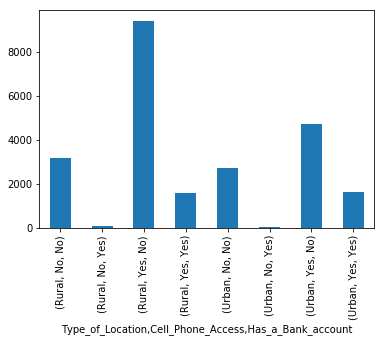

In [61]:
finance_dropped.groupby(['Type_of_Location','Cell_Phone_Access'])['Has_a_Bank_account'].value_counts().plot.bar()

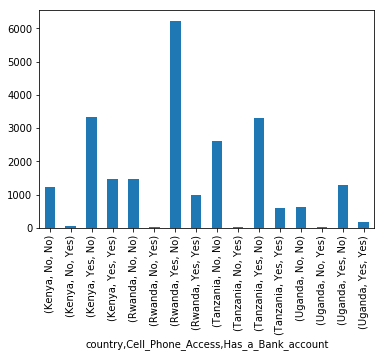

In [62]:
finance_dropped.groupby(['country','Cell_Phone_Access'])['Has_a_Bank_account'].value_counts().plot.bar()

In [0]:
from matplotlib import pyplot as plt
plt.scatter(X,Y1,color='red')
plt.scatter(X,Y2,color='blue')
plt.show()

TypeError: ignored

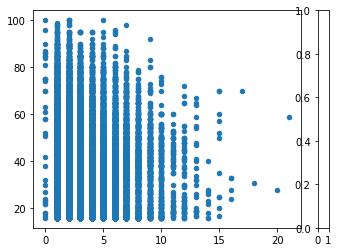

In [53]:
new_finance.plot.scatter('household_size', 'Respondent_Age',  colormap='jet')

In [0]:
colors = np.where(df["Animation"]==1,'y','k')
df.plot.scatter(x="year",y="length",c=colors)
plt.show()

<Figure size 1008x1008 with 0 Axes>

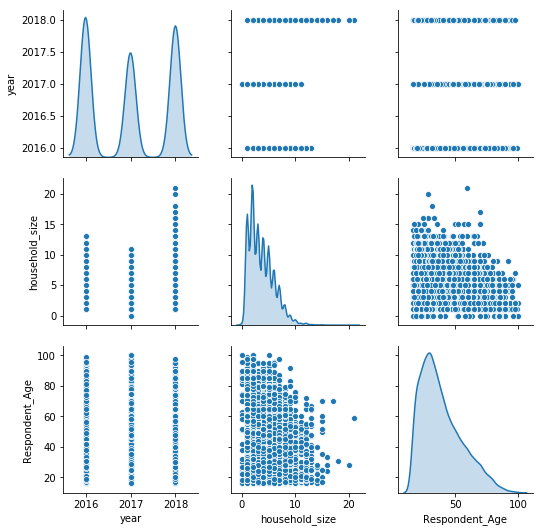

In [38]:
plt.figure(figsize=(14, 14))
sns.pairplot(finance_dropped, diag_kind='kde');

In [40]:
new_finance= pd.get_dummies(finance_dropped, prefix_sep='_', drop_first=True)
new_finance.head()

,year,household_size,Respondent_Age,country_Rwanda,country_Tanzania,country_Uganda,Has_a_Bank_account_Yes,Type_of_Location_Urban,Cell_Phone_Access_Yes,gender_of_respondent_Male,The_relationship_with_head_Head of Household,The_relationship_with_head_Other non-relatives,The_relationship_with_head_Other relative,The_relationship_with_head_Parent,The_relationship_with_head_Spouse,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,Level_of_Education_No formal education,Level_of_Education_Other/Dont know/RTA,Level_of_Education_Primary education,Level_of_Education_Secondary education,Level_of_Education_Tertiary education,Level_of_Education_Vocational/Specialised training,Type_of_Job_Farming and Fishing,Type_of_Job_Formally employed Government,Type_of_Job_Formally employed Private,Type_of_Job_Government Dependent,Type_of_Job_Informally employed,Type_of_Job_No Income,Type_of_Job_Other Income,Type_of_Job_Remittance Dependent,Type_of_Job_Self employed
0,2018,3.0,24.0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2018,5.0,70.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,5.0,26.0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,2018,5.0,34.0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,8.0,26.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
X = new_finance.drop('Has_a_Bank_account_Yes', 1)
y = new_finance['Has_a_Bank_account_Yes']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [46]:
explained_variance = pca.explained_variance_ratio_
explained_variance


array([1.09494592e-01, 8.09234724e-02, 6.62287621e-02, 6.17356393e-02,
       5.69083179e-02, 4.50482123e-02, 3.98088203e-02, 3.76794364e-02,
       3.66984396e-02, 3.37117670e-02, 3.23258882e-02, 3.09208875e-02,
       3.05256033e-02, 3.03304702e-02, 3.00391625e-02, 2.95890314e-02,
       2.93539661e-02, 2.88375089e-02, 2.68890878e-02, 2.45980478e-02,
       2.34060177e-02, 2.26663871e-02, 1.91470948e-02, 1.81702482e-02,
       1.54472563e-02, 1.27754037e-02, 1.06360746e-02, 9.43626373e-03,
       3.59368299e-03, 2.79000937e-03, 2.23102851e-04, 6.13456605e-05,
       1.67187329e-31])

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [49]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))


[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


In [55]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(new_finance)
chi_square_value, p_value


(1059927.4278613348, 0.0)

In [56]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(new_finance)

/usr/local/lib/python3.6/dist-packages/factor_analyzer/factor_analyzer.py:50: RuntimeWarning: invalid value encountered in sqrt
  Is = np.sqrt(1 / np.diag(m))


In [0]:
from factor_analyzer import FactorAnalyzer

In [64]:
fa = FactorAnalyzer()
fa.analyze(new_finance, 25, rotation=None)

ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,3.613916e+00
1,2.676789e+00
2,2.336850e+00
3,2.120603e+00
4,1.874679e+00
5,1.601792e+00
6,1.315702e+00
7,1.252006e+00
8,1.215640e+00
9,1.116583e+00


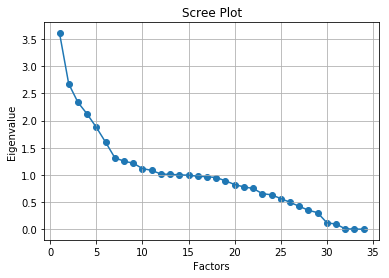

In [65]:
plt.scatter(range(1,new_finance.shape[1]+1),ev)
plt.plot(range(1,new_finance.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [67]:
fa = FactorAnalyzer()
fa.analyze(new_finance, 6, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
year,0.248878,-0.015401,0.822399,0.057293,-0.045526,0.206360
household_size,-0.533214,-0.185607,0.121496,-0.095612,-0.049260,-0.053928
Respondent_Age,0.003644,0.586938,0.005542,0.114544,0.428759,-0.052258
country_Rwanda,-0.644694,-0.000921,-0.703006,-0.029154,0.057037,-0.166314
country_Tanzania,0.846011,0.025619,-0.136935,-0.041377,-0.051602,-0.049869
country_Uganda,-0.117032,-0.066921,0.580264,0.008226,-0.032048,-0.085366
Has_a_Bank_account_Yes,0.001860,-0.071778,-0.010416,0.093227,0.088714,0.560403
Type_of_Location_Urban,0.520700,-0.029407,0.073888,0.002651,-0.099727,0.157764
Cell_Phone_Access_Yes,-0.192785,-0.226395,-0.099670,0.103850,0.074817,0.279165
gender_of_respondent_Male,-0.009589,-0.150048,-0.060800,0.529818,0.027700,0.170239


In [68]:
fa = FactorAnalyzer()
fa.analyze(new_finance, 5, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5
year,0.224786,-0.015955,0.817810,0.037901,0.206565
household_size,-0.492390,-0.186863,0.041622,-0.134023,0.052271
Respondent_Age,-0.104397,0.640655,0.060737,0.216158,-0.168855
country_Rwanda,-0.603019,0.000963,-0.770509,-0.034695,-0.090803
country_Tanzania,0.783339,0.016047,-0.025948,-0.002454,-0.186461
country_Uganda,-0.100375,-0.050208,0.479813,-0.039220,0.014102
Has_a_Bank_account_Yes,-0.043334,-0.085096,0.085087,0.181891,0.370647
Type_of_Location_Urban,0.506791,-0.052341,0.138578,0.012893,0.075000
Cell_Phone_Access_Yes,-0.212652,-0.226391,-0.062993,0.176313,0.204930
gender_of_respondent_Male,0.038025,-0.122807,-0.094514,0.518689,0.228475


In [69]:
fa.get_factor_variance()


,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,2.960486,1.983795,1.90400,1.810138,1.675477
Proportion Var,0.087073,0.058347,0.05600,0.053239,0.049279
Cumulative Var,0.087073,0.145420,0.20142,0.254659,0.303938
